In [3]:
import requests
import re
import seaborn as sns

In [4]:
def get_content(article_name):
    url = "http://en.wikipedia.org/w/api.php"
    r = requests.get(url, params = {'action': 'query', 'prop':'extracts', 'titles': article_name, 'format': 'json'})
    jdata = r.json()
    return jdata['query']['pages']['22834']['extract']

data = get_content("Ozone_layer")
print(data)

<p class="mw-empty-elt">
</p>


<p>The <b>ozone layer</b> or <b>ozone shield</b> is a region of Earth's stratosphere that absorbs most of the Sun's ultraviolet  radiation. It contains a high concentration of ozone (O<sub>3</sub>) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth's atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.</p><p>The ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature

In [5]:
def merge_contents(data):

    tags = re.compile(r'<.*?>')
    content = re.sub(tags, '', data)
    return content

merge_content = merge_contents(data)
print(merge_content)





The ozone layer or ozone shield is a region of Earth's stratosphere that absorbs most of the Sun's ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth's atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range of 5,500–6,000 K (5,230–5,730 °C), except that th

In [6]:
def tokenize(content):
    words = re.split(r'\W+', content)
    return words


collection = tokenize(merge_content)
print(collection)

['', 'The', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'Earth', 's', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'Sun', 's', 'ultraviolet', 'radiation', 'It', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'O3', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'The', 'ozone', 'layer', 'contains', 'less', 'than', '10', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'Earth', 's', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', '0', '3', 'parts', 'per', 'million', 'The', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', '15', 'to', '35', 'kilometers', '9', 'to', '22', 'mi', 'above', 'Earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'The', 'ozone', 'l

In [7]:
def lower_collection(collection):
    lower = []
    for word in collection[1:]:
        if word.isdigit() == False:
            lower.append(word.lower())
    return lower

collection = lower_collection(collection)
print(collection)

['the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'earth', 's', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'sun', 's', 'ultraviolet', 'radiation', 'it', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'o3', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'the', 'ozone', 'layer', 'contains', 'less', 'than', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'earth', 's', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', 'parts', 'per', 'million', 'the', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', 'to', 'kilometers', 'to', 'mi', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'the', 'ozone', 'layer', 'was', 'discovered', 'in', 'by', 'th

In [8]:
def count_frequency(collection):
    freq = {}
    for word in collection:
        freq[word] = collection.count(word)
    return freq        

def print_most_frequent(frequencies, n):
    most_frequent = {}
    sorted_keys = sorted(frequencies, key=frequencies.get)
    
    for word in sorted_keys[::-1]:
        most_frequent[word] = frequencies[word]            

    return dict(list(most_frequent.items())[:n])

frequencies = count_frequency(collection)

most_frequent_10 = print_most_frequent(frequencies, 10)

print(frequencies)

{'the': 194, 'ozone': 82, 'layer': 28, 'or': 4, 'shield': 2, 'is': 35, 'a': 32, 'region': 1, 'of': 94, 'earth': 11, 's': 24, 'stratosphere': 12, 'that': 19, 'absorbs': 4, 'most': 6, 'sun': 5, 'ultraviolet': 13, 'radiation': 16, 'it': 10, 'contains': 2, 'high': 5, 'concentration': 4, 'o3': 3, 'in': 62, 'relation': 2, 'to': 55, 'other': 7, 'parts': 4, 'atmosphere': 12, 'although': 5, 'still': 2, 'small': 2, 'gases': 2, 'less': 4, 'than': 4, 'per': 3, 'million': 4, 'while': 4, 'average': 2, 'as': 12, 'whole': 1, 'about': 12, 'mainly': 2, 'found': 3, 'lower': 2, 'portion': 1, 'from': 14, 'approximately': 2, 'kilometers': 2, 'mi': 1, 'above': 4, 'its': 6, 'thickness': 3, 'varies': 3, 'seasonally': 1, 'and': 71, 'geographically': 1, 'was': 15, 'discovered': 2, 'by': 22, 'french': 1, 'physicists': 1, 'charles': 1, 'fabry': 1, 'henri': 1, 'buisson': 1, 'measurements': 1, 'showed': 1, 'sent': 1, 'out': 6, 'surface': 10, 'reaching': 3, 'ground': 3, 'on': 9, 'usually': 1, 'consistent': 1, 'with':

In [9]:
print(most_frequent_10)

{'the': 194, 'of': 94, 'ozone': 82, 'and': 71, 'in': 62, 'to': 55, 'is': 35, 'a': 32, 'layer': 28, 's': 24}


<AxesSubplot:>

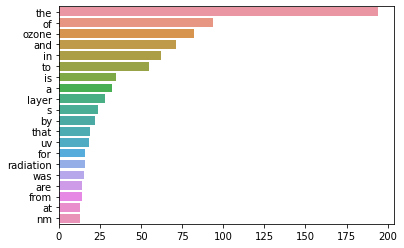

In [10]:
most_frequent_20 = print_most_frequent(frequencies, 20)
ox = [v for k,v in most_frequent_20.items()]
oy = [k for k,v in most_frequent_20.items()]
sns.barplot(x = ox, y = oy)

In [11]:
stop_words = [ "the", "a", "of", "to", "in", "about", "by", "is", "that", "was", "are", "for", "at", "from", "s", "and", "or", "as",
             "with", "be", "this", "these", 'it', 'on', 'into', 'has', 'have', 'which', 'because', 'other', 'all', 'can', 'an', 'out', 
              'o', 'm', 'its', 'most', 'j']

In [12]:
def remove_stop_words(words, stop_words):
    fcollection = []
    for word in collection:
        if word not in stop_words:
            fcollection.append(word)
                 
    return fcollection

filtered_collection = remove_stop_words(collection, stop_words)
print(filtered_collection)

['ozone', 'layer', 'ozone', 'shield', 'region', 'earth', 'stratosphere', 'absorbs', 'sun', 'ultraviolet', 'radiation', 'contains', 'high', 'concentration', 'ozone', 'o3', 'relation', 'parts', 'atmosphere', 'although', 'still', 'small', 'relation', 'gases', 'stratosphere', 'ozone', 'layer', 'contains', 'less', 'than', 'parts', 'per', 'million', 'ozone', 'while', 'average', 'ozone', 'concentration', 'earth', 'atmosphere', 'whole', 'parts', 'per', 'million', 'ozone', 'layer', 'mainly', 'found', 'lower', 'portion', 'stratosphere', 'approximately', 'kilometers', 'mi', 'above', 'earth', 'although', 'thickness', 'varies', 'seasonally', 'geographically', 'ozone', 'layer', 'discovered', 'french', 'physicists', 'charles', 'fabry', 'henri', 'buisson', 'measurements', 'sun', 'showed', 'radiation', 'sent', 'surface', 'reaching', 'ground', 'earth', 'usually', 'consistent', 'spectrum', 'black', 'body', 'temperature', 'range', 'k', 'c', 'except', 'there', 'no', 'radiation', 'below', 'wavelength', 'nm'

<AxesSubplot:>

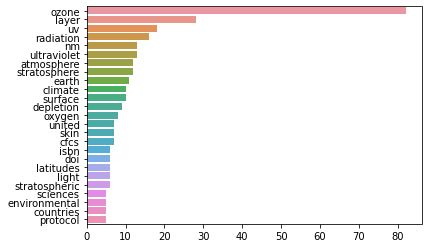

In [13]:
frequencies = count_frequency(filtered_collection)
most_frequent_25 = print_most_frequent(frequencies, 25)
ox = [v for k,v in most_frequent_25.items()]
oy = [k for k,v in most_frequent_25.items()]
sns.barplot(x = ox, y = oy)